<a href="https://colab.research.google.com/github/LeandroCoelhos/exemplos_modelos/blob/main/PyCaret_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyCaret Modelos de Regressão**

## **DADOS DE CUSTOS MÉDICOS**

Utilizarei a base de "Medical Cost" nativa do pacote pycaret.

In [2]:
pip install pycaret

     |████████████████████████████████| 266kB 3.6MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 174kB 8.6MB/s 
     |████████████████████████████████| 1.7MB 9.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 1.4MB 16.5MB/s 
     |████████████████████████████████| 2.0MB 25.7MB/s 
     |████████████████████████████████| 14.2MB 195kB/s 
     |████████████████████████████████| 112kB 45.3MB/s 
     |████████████████████████████████| 6.8MB 28.3MB/s 
     |████████████████████████████████| 256kB 40.4MB/s 
     |████████████████████████████████| 276kB 45.6MB/s 
     |████████████████████████████████| 1.2MB 44.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 645kB 39.9MB/s 


In [19]:
from pycaret.datasets import get_data
import pandas as pd
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


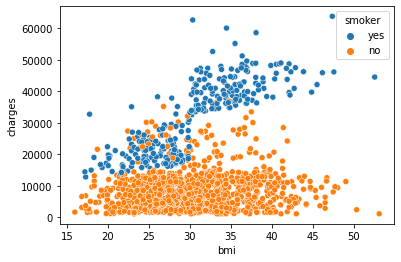

In [5]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Objetivo: construir um bom modelo para previsão dos custos médicos de uma pessoa**

In [6]:
import pycaret.regression as pyreg 

In [7]:
?pyreg.setup #documentação da função setup

In [8]:
# setup
regressao = pyreg.setup(data = dados, target = 'charges', 
                       combine_rare_levels = True,
                       normalize = True)

,Description,Value
0,session_id,5654
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [9]:
pyreg.models().shape

(23, 3)

In [11]:
pyreg.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [10]:
#criando um modelo isolado
rf = pyreg.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2306.9143,2.054449e+07,4532.6034,0.8453,0.3748,0.2858
1,2524.4864,2.197352e+07,4687.5923,0.8810,0.3980,0.2672
2,2892.6067,2.358793e+07,4856.7406,0.7931,0.5380,0.4082
3,3202.6998,3.176381e+07,5635.9392,0.7301,0.4903,0.3405
4,3345.1969,3.306878e+07,5750.5460,0.8135,0.5025,0.3849
5,2416.8110,1.520831e+07,3899.7835,0.8814,0.3914,0.3032
6,2572.0246,1.929872e+07,4393.0310,0.8981,0.5053,0.2997
7,3385.0730,2.973380e+07,5452.8704,0.7857,0.6255,0.6128
8,3127.3641,3.106948e+07,5574.0002,0.7810,0.5477,0.3572
9,2402.7832,1.815534e+07,4260.9087,0.8655,0.4393,0.2822


In [13]:
#buscando melhores hiperparametros
rf_tunado = pyreg.tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1607.2560,1.835454e+07,4284.2198,0.8618,0.2715,0.1338
1,2301.6412,2.572364e+07,5071.8480,0.8607,0.3777,0.1552
2,2007.2182,1.901540e+07,4360.6656,0.8332,0.4535,0.1975
3,2288.2576,2.914994e+07,5399.0688,0.7523,0.3956,0.1478
4,2521.8219,3.005741e+07,5482.4635,0.8305,0.4078,0.1807
5,1794.5383,1.625527e+07,4031.7820,0.8732,0.3418,0.1497
6,2043.3932,1.719554e+07,4146.7506,0.9092,0.4701,0.1928
7,2340.7588,2.319551e+07,4816.1717,0.8328,0.4187,0.2409
8,2152.0748,2.490117e+07,4990.1075,0.8244,0.4582,0.1637
9,2126.3401,1.943559e+07,4408.5812,0.8560,0.4203,0.1705


In [14]:
# Comparando os modelos implementados, ordenando pelo RMSLE 
melhores = pyreg.compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2622.1831,2.241261e+07,4706.9102,0.8422,0.4363,0.3048,0.092
huber,Huber Regressor,3507.3762,4.847084e+07,6938.1225,0.6555,0.4705,0.2180,0.040
par,Passive Aggressive Regressor,3734.7872,4.891861e+07,6963.8088,0.6577,0.4752,0.2080,0.054
rf,Random Forest Regressor,2817.5960,2.444042e+07,4904.4015,0.8275,0.4813,0.3542,0.557
et,Extra Trees Regressor,2808.5342,2.791382e+07,5241.4887,0.8024,0.4974,0.3495,0.503
lightgbm,Light Gradient Boosting Machine,2932.4841,2.480253e+07,4959.3481,0.8255,0.5645,0.3723,0.101
lar,Least Angle Regression,4324.1043,3.761361e+07,6118.7337,0.7359,0.5766,0.4520,0.016
lr,Linear Regression,4324.1046,3.761349e+07,6118.7231,0.7359,0.5766,0.4520,0.015
knn,K Neighbors Regressor,5041.1463,6.485790e+07,7992.6791,0.5564,0.5771,0.4782,0.063
lasso,Lasso Regression,4323.0445,3.760494e+07,6118.0425,0.7360,0.5773,0.4519,0.017


In [15]:
melhores

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5654, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
                tol=1e-05, warm_start=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=10

In [16]:
melhores_tunados = []# faz uma lista vazia para armazenar os modelos com os melhores hiperparâmetros

for i in range(len(melhores)):
    melhores_tunados.append(pyreg.tune_model(melhores[i], optimize = 'RMSLE'))#otimiza segundo a métrica RMSLE

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1555.2217,1.830342e+07,4278.2496,0.8622,0.2446,0.1057
1,2558.5409,2.688402e+07,5184.9802,0.8544,0.3688,0.1554
2,2092.7982,2.033775e+07,4509.7395,0.8216,0.4407,0.1642
3,2331.7028,2.879228e+07,5365.8437,0.7554,0.3846,0.1378
4,2476.7835,3.057114e+07,5529.1171,0.8276,0.4089,0.1758
5,1667.7013,1.477096e+07,3843.3012,0.8848,0.3222,0.1346
6,2277.1958,2.050217e+07,4527.9326,0.8918,0.4224,0.1625
7,2419.3972,2.443464e+07,4943.1407,0.8239,0.3474,0.1679
8,2022.4712,2.397540e+07,4896.4678,0.8310,0.4307,0.1434
9,2188.6720,1.968892e+07,4437.2197,0.8541,0.3734,0.1425


In [21]:
#Faz a predição dos modelos tunados com o conjunto de teste separado inicialmente (validação dupla)
for i in range(len(melhores_tunados)): 
    ccc = pyreg.predict_model(melhores_tunados[i]) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2643.6078,2.063983e+07,4543.1083,0.8578,0.4268,0.3454


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,3608.5868,5.946578e+07,7711.4055,0.5903,0.417,0.1776


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,3256.9704,4.092431e+07,6397.2113,0.718,0.4298,0.2004


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2038.5306,2.131264e+07,4616.561,0.8532,0.3838,0.1736


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2209.8178,2.326043e+07,4822.9065,0.8397,0.3665,0.1569


In [ ]:
combinado9 = pyreg.blend_models(melhores_tunados[:9])#faz uma combinação de modelos(regressão n tem hard ou soft)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2467.4111,21553139.8010,4642.5359,0.8821,0.3765,0.1911
1,3145.3176,35060677.0825,5921.2057,0.7751,0.4906,0.2598
2,2459.2792,24869205.8798,4986.9034,0.7730,0.3785,0.2014
3,2775.6409,25110942.2028,5011.0819,0.8292,0.4050,0.2340
4,2392.0294,22881656.6846,4783.4775,0.8499,0.3448,0.2333
5,3436.6883,36739636.5034,6061.3230,0.8198,0.4252,0.2283
6,3028.3453,31423925.5694,5605.7047,0.7791,0.5160,0.2652
7,1910.5525,10023799.7501,3166.0385,0.9282,0.2926,0.2153
8,2136.3247,16622093.6229,4077.0202,0.8345,0.3339,0.2216
9,2853.3325,27101672.7947,5205.9267,0.7974,0.5097,0.2728


In [ ]:
et = pyreg.create_model('et')#melhor modelo tunado

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2263.6597,17658565.4894,4202.2096,0.8646,0.4502,0.3033
1,3175.1706,33398167.4162,5779.1148,0.8095,0.4782,0.2834
2,2640.7599,25029684.5330,5002.9676,0.8469,0.4938,0.2820
3,3130.4011,29617667.6655,5442.2117,0.7648,0.4303,0.2927
4,2511.0221,29157389.9477,5399.7583,0.7885,0.4222,0.2818
5,2867.6876,26969273.4122,5193.1949,0.8377,0.4769,0.3586
6,3214.2863,39951541.9263,6320.7232,0.7603,0.5474,0.3386
7,3432.2699,37634080.5125,6134.6622,0.7793,0.5006,0.3093
8,2784.5080,28282718.2938,5318.1499,0.8098,0.5195,0.3732
9,2815.6807,29757400.0283,5455.0344,0.7284,0.5178,0.4214


In [ ]:
et_tunado = pyreg.tune_model(et, optimize = 'RMSLE')#faz a tunagem novamente do modelo

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1698.1751,15374732.7317,3921.0627,0.8821,0.3572,0.1340
1,2866.4481,36909853.8411,6075.3480,0.7895,0.4735,0.1704
2,2034.8378,23198944.7445,4816.5283,0.8581,0.4186,0.1243
3,2037.3400,17908319.2766,4231.8222,0.8578,0.3526,0.1375
4,2139.8005,25736196.0159,5073.0855,0.8133,0.2787,0.1413
5,2784.0144,30460716.6617,5519.1228,0.8167,0.3856,0.1562
6,2312.5548,29853296.4935,5463.8170,0.8209,0.4471,0.1538
7,2447.9635,31402413.1888,5603.7856,0.8159,0.4425,0.1437
8,2328.2954,25825043.3957,5081.8346,0.8263,0.3927,0.1440
9,1921.7377,18156371.7335,4261.0294,0.8343,0.3882,0.1475


In [ ]:
et_tunado

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae', max_depth=8,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.01, min_impurity_split=None,
                    min_samples_leaf=6, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                    oob_score=False, random_state=3638, verbose=0,
                    warm_start=False)

In [ ]:
# Performance nos dados de validacao
pred = pyreg.predict_model(et_tunado)
#pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1846.7462,17087886.8348,4133.7497,0.8719,0.3314,0.1387


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,0.812384,-1.405718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9361.327148,9399.288898
1,-0.465108,2.000303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11326.714844,5018.385022
2,0.954327,-1.082792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9863.471680,10515.879700
3,-0.465108,-0.679135,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4571.413086,4517.129199
4,1.451129,-1.082792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12523.604492,12692.789685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1.458712,0.375475,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1748.774048,1918.148013
398,-0.181221,1.308561,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,40419.019531,41366.105518
399,-1.458712,1.145398,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2138.070801,1967.859885
400,-0.607051,-0.149706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19350.369141,30531.678564


In [ ]:
pred['Label']

0       9399.288898
1       5018.385022
2      10515.879700
3       4517.129199
4      12692.789685
           ...     
397     1918.148013
398    41366.105518
399     1967.859885
400    30531.678564
401    18768.970313
Name: Label, Length: 402, dtype: float64

In [ ]:
pyreg.evaluate_model(et_tunado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Utilizando o modelo escolhido em todo conjunto de dados para gerar o modelo final
modelo_final = pyreg.finalize_model(et_tunado)

In [ ]:
# Salvando o modelo e as transformações de variaveis feitas para se chegar nele
#salva com a extensão 'pkl', que são objetos do python
#isso é usado para por o modelo em produção, data uma entrada ela faz as tranformações para o modelo funcionar
pyreg.save_model(modelo_final, 'meu-modelo-para-charges')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mae', max_depth=8,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

---

In [ ]:
''' 
Deploy Básico (por em produção o modelo 'pkl')
como se fosse um programa a parte, ele vai ler o arquivo gerado do modelo, dada as entradas colocadas em um dictionary
em uma entrada individual, passado os dados ele submete ao modelo e da as respostas preditas.
'''
import pandas as pd

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = pyreg.load_model('meu-modelo-para-charges')

    pred = float(pyreg.predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2) #assume um valor 80% acima do valor de previsto. Regra de Negócio a ser aplicada
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))


In [ ]:
#Entradas para serem preditas
CustoSeguro(age = 34, sex = 'male', bmi = 30, children = 0, smoker =  'yes', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 34
Sexo: male
IMC: 30
Crianças: 0
Fumante: yes
Região: southwest
 
Custo do Seguro: $27260.69
Valor de Venda: $49069.24


In [ ]:
#entrada simplificada
CustoSeguro(45, 'female', 20, 2, 'yes', 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 45
Sexo: female
IMC: 20
Crianças: 2
Fumante: yes
Região: southwest
 
Custo do Seguro: $19823.38
Valor de Venda: $35682.08


In [ ]:
CustoSeguro(age = 45, 
            sex = 'female', 
            bmi = 40, 
            children = 5, 
            smoker =  'yes', 
            region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 45
Sexo: female
IMC: 40
Crianças: 5
Fumante: yes
Região: southwest
 
Custo do Seguro: $44076.59
Valor de Venda: $79337.86


---